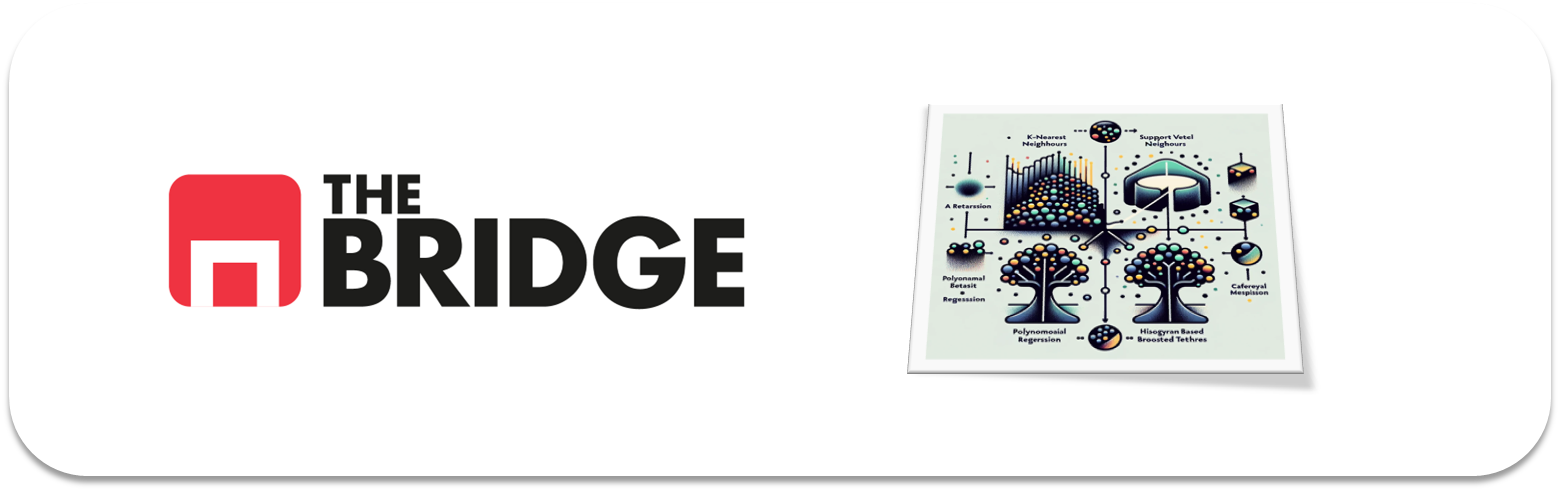

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample


### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [221]:
# El primer paso será leer los datos y cargarlos a un dataframe
df = pd.read_csv('./data/credit_npo.csv')

# Visualizamos el contenido
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [222]:

# Vamos a ver si hay nulos
# 
for col in df.columns:
    print(col)
    print(len(df[df[col].isna()==True]))

# En principio elimino los nulos veremos la influencia
df.dropna(inplace=True)
print('********************************************')

for col in df.columns:
    print(col)
    print(len(df[df[col].isna()==True]))

SeriousDlqin2yrs
0
RevolvingUtilizationOfUnsecuredLines
0
age
0
NumberOfTime30-59DaysPastDueNotWorse
0
DebtRatio
0
MonthlyIncome
721
NumberOfOpenCreditLinesAndLoans
0
NumberOfTimes90DaysLate
0
NumberRealEstateLoansOrLines
0
NumberOfTime60-89DaysPastDueNotWorse
0
NumberOfDependents
177
********************************************
SeriousDlqin2yrs
0
RevolvingUtilizationOfUnsecuredLines
0
age
0
NumberOfTime30-59DaysPastDueNotWorse
0
DebtRatio
0
MonthlyIncome
0
NumberOfOpenCreditLinesAndLoans
0
NumberOfTimes90DaysLate
0
NumberRealEstateLoansOrLines
0
NumberOfTime60-89DaysPastDueNotWorse
0
NumberOfDependents
0


In [223]:
# De la información obtenida en la red las columnas tienen el siguiente significado:

# SeriousDlqin2yrs: La persona experimento una morosidad de 90 días o peor
# RevolvingUtilizationOfUnsecuredLines: Total del credito que se ha utilizado sobre el concedido
# age: edad
# NumberOfTime30-59DaysPastDueNotWorse: Número de veces que el prestatario ha estado en mora entre 30 y 59 días, pero no ha empeorado en los últimos 2 años.
# DebtRatio: Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por el porcentaje de ingreso bruto mensual
# MonthlyIncome: Ingresos mensuales reales
# NumberOfOpenCrediLinesAndLoans: Número de préstamos abiertos (a plazos, como préstamos para automóviles o hipotecas) y líneas de crédito (por ejemplo, tarjetas de crédito)
# NumberOfTimes90DaysLate: Número de veces que el prestatario ha estado vencido por 90 días o más.
# NumberRealEstateLoansOrLines: Número de préstamos hipotecarios y inmobiliarios, incluidas líneas de crédito sobre el valor de la vivienda
# NumberOfTime60-89DaysPastDueNotWorse: Número de veces que el prestatario ha estado en mora entre 60 y 89 días, pero no ha empeorado en los últimos 2 años.
# NumberOfDependents: Número de dependientes de la familia excluidos ellos mismos (cónyuge, hijos, etc.)

In [224]:
# Comprobamos la cantidad de valores y los tipos de cada uno

for col in df.columns:
    print('********************\ncolumna:',col, '\nvalores',df[col].value_counts(), '\ncantidad de valores:',df[col].nunique())

********************
columna: SeriousDlqin2yrs 
valores SeriousDlqin2yrs
0    10986
1      830
Name: count, dtype: int64 
cantidad de valores: 2
********************
columna: RevolvingUtilizationOfUnsecuredLines 
valores RevolvingUtilizationOfUnsecuredLines
0.000000    753
1.000000    735
0.044530      2
0.022799      2
0.953488      2
           ... 
0.589522      1
0.932423      1
0.048827      1
1.001999      1
0.252566      1
Name: count, Length: 10314, dtype: int64 
cantidad de valores: 10314
********************
columna: age 
valores age
47     336
49     319
48     317
50     297
45     297
      ... 
95       3
94       2
97       1
96       1
101      1
Name: count, Length: 78, dtype: int64 
cantidad de valores: 78
********************
columna: NumberOfTime30-59DaysPastDueNotWorse 
valores NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64 
cantidad de valo

In [225]:
'''
De los valores vemos que los tipos de los valores serían

- SeriousDlqin2yrs:                         binaria (solo puede ser si o no)
- RevolvingUtilizationOfUnsecuredLines:     numérica_continua (puede tomar infinitos valores). 
- age:                                      numérica discreta (puede tomar un rango discreto de valores normalmente entre 18 y 100 años y sin decimales entre ellos)
- NumberOfTime30-59DaysPastDueNotWorse:     numerica discreta (puede tomar un rango de valores finito sin decimales)
- DebtRatio:                                numérica continua (puede tener un rango de valores infinito)
- MonthlyIncome:                            numerica continua (puede tomar un rango de valores infinito). 
- NumberOfOpenCreditLinesAndLoans:          numérica discreta (puede tomar un rango de valores finito sin decimales)
- NumberOfTimes90DaysLate:                  numérica discreta (puede tomar un rango de valores finito sin decimales)
- NumberRealEstateLoansOrLines:             numérica discreta (puede tomar un rango de valores finito sin decimales)
- NumberOfTime60-89DaysPastDueNotWorse:     numérica discreta (puede tomar un rango de valores finito sin decimales)
- NumberOfDependents:                       numérica discreta (puede tomar un rango de valores finito sin decimales)

Para este caso vamos a pasar a categórica la variable continua del salario
'''


'\nDe los valores vemos que los tipos de los valores serían\n\n- SeriousDlqin2yrs:                         binaria (solo puede ser si o no)\n- RevolvingUtilizationOfUnsecuredLines:     numérica_continua (puede tomar infinitos valores). \n- age:                                      numérica discreta (puede tomar un rango discreto de valores normalmente entre 18 y 100 años y sin decimales entre ellos)\n- NumberOfTime30-59DaysPastDueNotWorse:     numerica discreta (puede tomar un rango de valores finito sin decimales)\n- DebtRatio:                                numérica continua (puede tener un rango de valores infinito)\n- MonthlyIncome:                            numerica continua (puede tomar un rango de valores infinito). \n- NumberOfOpenCreditLinesAndLoans:          numérica discreta (puede tomar un rango de valores finito sin decimales)\n- NumberOfTimes90DaysLate:                  numérica discreta (puede tomar un rango de valores finito sin decimales)\n- NumberRealEstateLoansOrLin

In [226]:
# En los casos de RevolvingUtilizationOfUnsecuredLines y MonthyIncome podemos pensar en hacer una clasificación por rangos como categórica.
# Lo revisaremos una vez hagamos el train y test.

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Una vez analizados los datos queremos saber quien va a tener problemas de morosidad en los 2 proximos años.
Hemos visto por tanto que:
- Se trata de un problema de **Clasificacion**
- La variable target es **SeriousDlqin2yrs**

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: xlabel='SeriousDlqin2yrs', ylabel='percent'>

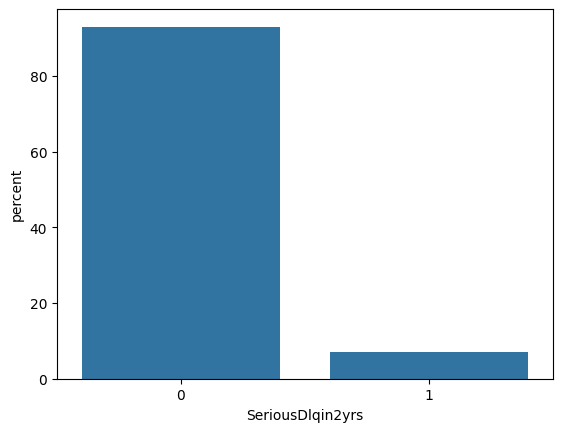

In [227]:
# Vamos a ver la distribución de frecuencias del target
# Primero la vamos a pasar a entero

df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype(int) 

sns.countplot(df,x='SeriousDlqin2yrs', stat = 'percent')

In [228]:
# Estamos viendo que existe un desbalance muy alto que nos va a obligar a tomar medidas durante la clasificación
# Analizaremos si usar weighted classes, sobremuestreo o bajomuestreo

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [229]:
# Para empezar vamos a hacer el split entre train y test
target = 'SeriousDlqin2yrs'

X = df.drop(columns=target)
y = df[target]
# Separamos con estratificación para mantener la proporcion de 0 y 1 en el target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


3545


<Axes: xlabel='SeriousDlqin2yrs', ylabel='percent'>

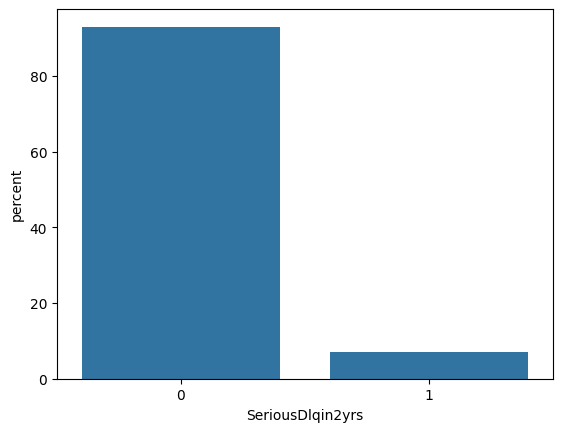

In [230]:
# Vamos a analizar un poco y_test para ver si mantiene la proporcion
valores_y = pd.DataFrame(y_test)
print(len(valores_y))
sns.countplot(valores_y,x='SeriousDlqin2yrs',stat='percent')

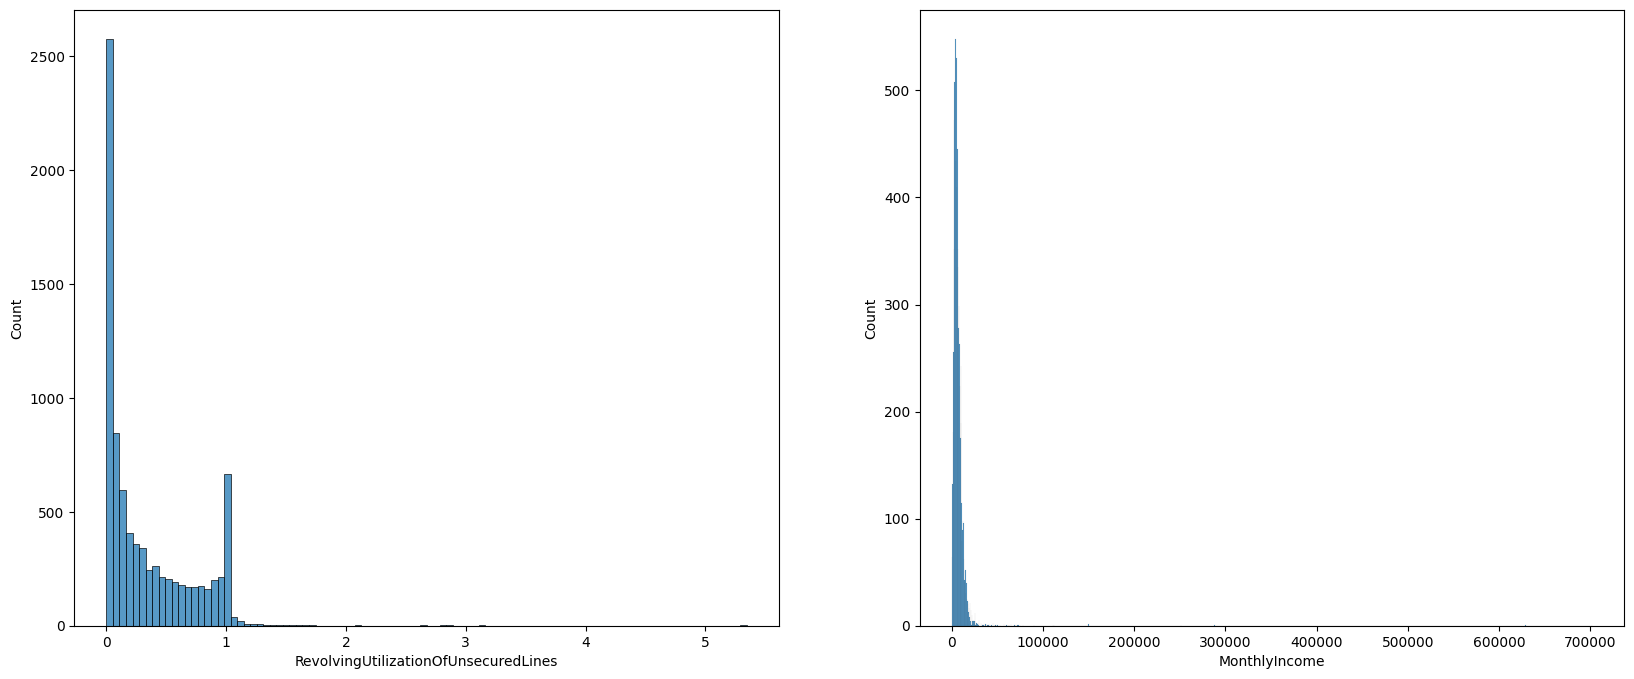

In [231]:
# Vemos que se han mantenido las proporciones
# Comenzamos a realizar un Mini-EDA
# Voy a empezar por analizar si paso las numéricas continuas a categóricas o las dejo como están

columnas = ['RevolvingUtilizationOfUnsecuredLines','MonthlyIncome']

fig,axes = plt.subplots(1,2,figsize=(20,8))
for col,axe in zip(columnas,axes):
    sns.histplot(X_train,x=col,ax=axe)

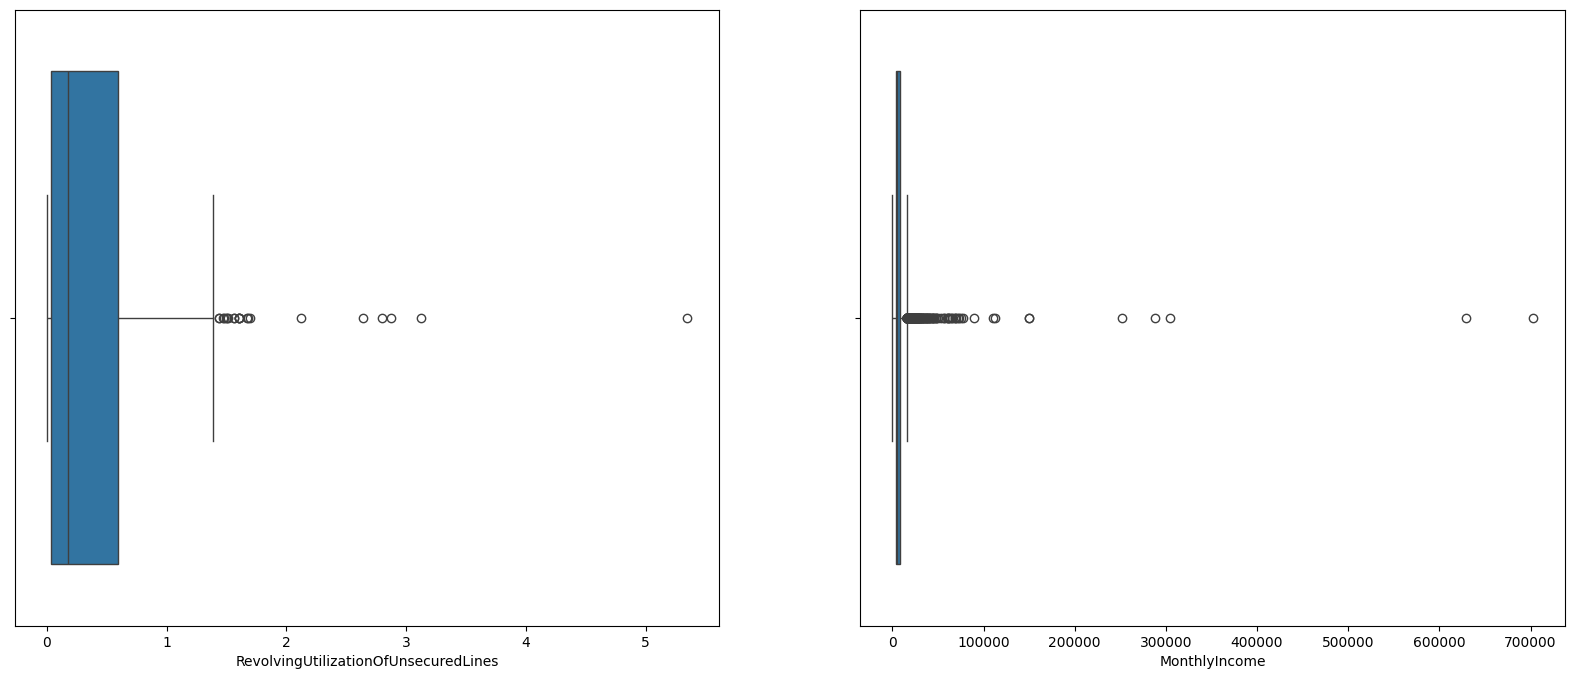

In [232]:
# Estamos viendo que los valores están my concentrados entre 0 y 1 para la primera variable. 
# Los valores no obstante llegan hasta un valor de 6. Habría que aclarar con la entidad qué significa esto y si tiene sentido.
# 
# Por otra parte vemos una gran dispersion de valores en MonthlyIncome.
# Para analizarlo bien vamos a hacer una visualización de los outliers. 

fig,axes = plt.subplots(1,2,figsize=(20,8))
for col,axe in zip(columnas,axes):
    sns.boxplot(X_train,x=col,ax=axe)

In [233]:
# Podemos ver que existen varios outliers que se quedan muy alejados del valor de la media. En principio estos valores podrían desvirtuar la clasificación. 
# Tenemos que decidir qué hacemos con ellos. Si lo mantenemos o no. Como no tenemos más datos del cliente sobre estos valores vamos a dejarlos.
# Una posible acción para el caso de obtener predicciones de clasificación incorrecta sería abordar la eliminación de esas filas pero de momento lo dejamos.

In [234]:
# A partir de aquí vamos a revisar la relación de las variables
# Juntamos las features y el target en el mismo dataset
train = X_train.copy()
train['SeriousDlqin2yrs'] = y_train

train.head()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
9268,0.092557,43,0,0.128300,5416.0,5,0,0,0,1.0,0
2956,1.000000,34,0,1.115169,3750.0,2,0,1,0,0.0,0
4540,0.049738,54,0,0.346691,13400.0,10,0,1,0,3.0,0
11597,0.335311,51,0,0.553094,3700.0,8,0,2,0,2.0,0
12423,0.062787,37,0,0.507443,4500.0,7,0,2,0,0.0,0


In [235]:
corr = train.corr(numeric_only = True)
corr[target].sort_values(ascending = False)


SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.274168
NumberOfTime30-59DaysPastDueNotWorse    0.129356
NumberOfTimes90DaysLate                 0.127851
NumberOfTime60-89DaysPastDueNotWorse    0.104711
NumberOfDependents                      0.044140
NumberRealEstateLoansOrLines            0.000657
DebtRatio                              -0.006761
MonthlyIncome                          -0.027737
NumberOfOpenCreditLinesAndLoans        -0.036075
age                                    -0.101628
Name: SeriousDlqin2yrs, dtype: float64

<Axes: >

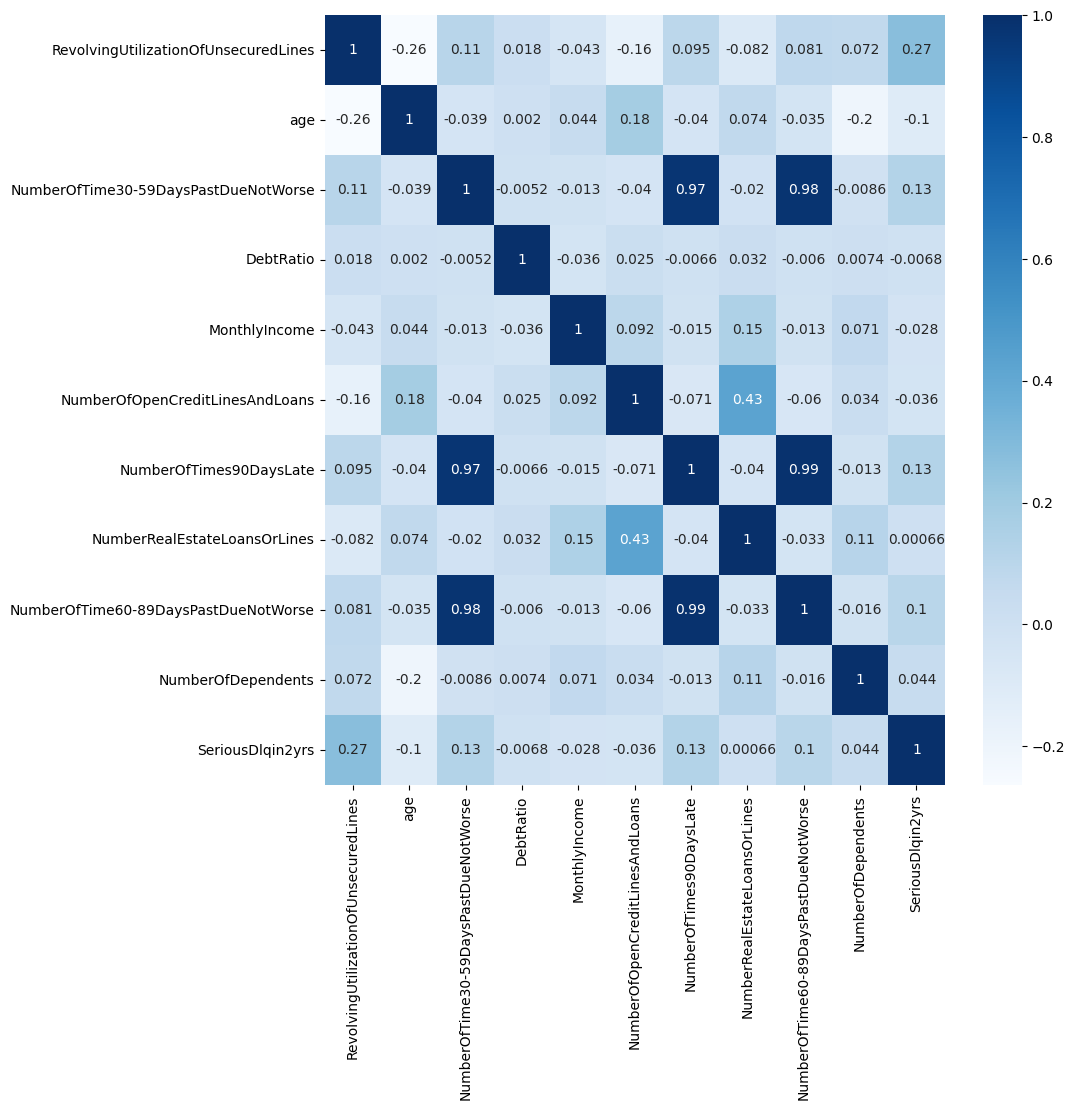

In [236]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [237]:
# Podemos ver que las variables que más relaión tienen con el target son RevolvingUtilizationOfUnsecuredLines y negativamente la edad
# Tambien vemos que la que menos afecta es NumerRealEstateLoansOrLines.
# Adicionalmente estamos viendo que hay variables que correlan entre ellas como las que tienen que ver con los retrasos en pagos

# Vemos la relación en valor absoluto

serie_corr = np.abs(corr[target]).sort_values(ascending = False)
serie_corr


SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.274168
NumberOfTime30-59DaysPastDueNotWorse    0.129356
NumberOfTimes90DaysLate                 0.127851
NumberOfTime60-89DaysPastDueNotWorse    0.104711
age                                     0.101628
NumberOfDependents                      0.044140
NumberOfOpenCreditLinesAndLoans         0.036075
MonthlyIncome                           0.027737
DebtRatio                               0.006761
NumberRealEstateLoansOrLines            0.000657
Name: SeriousDlqin2yrs, dtype: float64

In [238]:
# Marcamos el criterio por encima de 0.01

criterio = 0.03
features_numericas = serie_corr[serie_corr > criterio].index.to_list()
features_numericas.remove(target)
features_numericas

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age',
 'NumberOfDependents',
 'NumberOfOpenCreditLinesAndLoans']

In [239]:
# Realizamos ahora una comprobación de la colinealidad de las features
criterio_col = 0.7
excluidas = []
for col in features_numericas:
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            if col != col_2 and col_2 in features_numericas:
                if np.abs(valor_corr) >= criterio_col:
                    excluidas.append(col_2)
excluidas = list(set(excluidas))
print(excluidas)


['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


In [240]:
# Quitamos las columnas de las features
for col in excluidas:
    features_numericas.remove(col)

features_numericas


['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'age',
 'NumberOfDependents',
 'NumberOfOpenCreditLinesAndLoans']

In [241]:
# Dejamos ya solo estas columnas en X_train y X_test
X_train = X_train[features_numericas]
X_test = X_test[features_numericas]

X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
9268,0.092557,0,43,1.0,5
2956,1.000000,0,34,0.0,2
4540,0.049738,0,54,3.0,10
11597,0.335311,0,51,2.0,8
12423,0.062787,0,37,0.0,7
...,...,...,...,...,...
880,0.324218,0,41,0.0,17
4371,0.174437,0,61,0.0,7
5767,0.039651,0,64,0.0,6
7494,1.000000,0,29,6.0,0


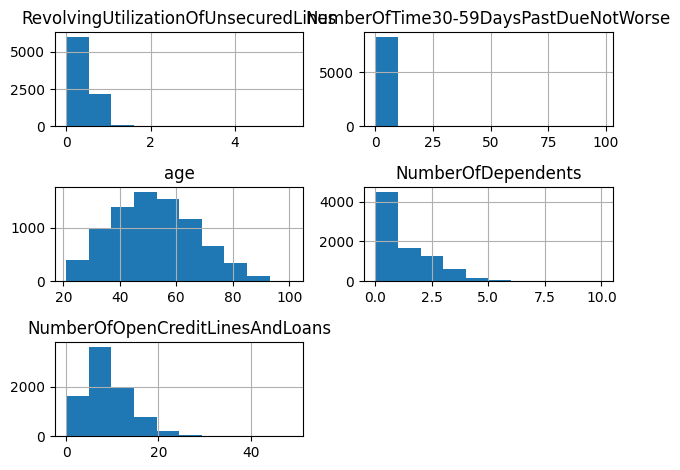

In [242]:
# Vamos a revisar las numéricas

X_train[features_numericas].hist()
plt.tight_layout()

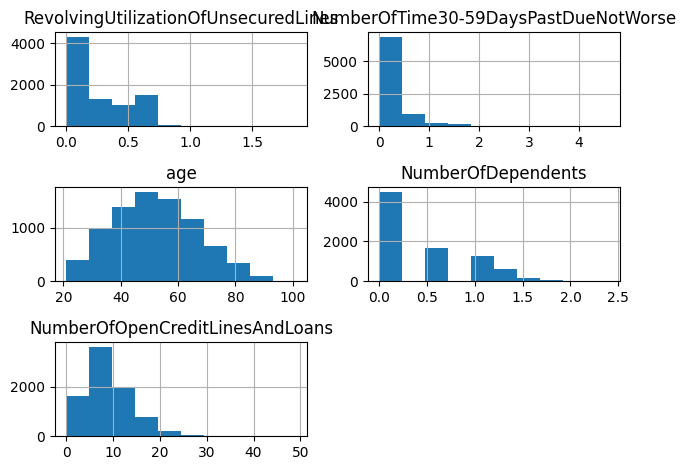

In [243]:
# Tenemos 4 variables que podríamos procesar para intentar tener una distribución mas extendida en vez de tan extrema a la derecha
# Vamos a aplicar el logaritmo a las variables menos a age y NumberOfOpenCreditLinesAndLoans, a ver como queda.
# Hay valores en 0 así que habrá que añadir un valor de 1 para aplicar el logaritmo

para_no_procesar = ['age','NumberOfOpenCreditLinesAndLoans']
# Quitamos estas variables de la lista de features que nos hemos quedado
for feat in para_no_procesar:
    features_numericas.remove(feat)

# Aplicamos el logaritmo en las features numericas que quedan tanto en Train como en Test
for feature in features_numericas:
    X_train[feature] = X_train[feature]+1
    X_train[feature] = X_train[feature].apply(np.log)
    
    X_test[feature] = X_test[feature]+1
    X_test[feature] = X_test[feature].apply(np.log)

X_train.hist()
plt.tight_layout()

In [244]:
# Una vez hemos hecho esto vemos que las escalas son muy distintas.
# Unos valores llegan hasta 2, otros hasta 100, otros hasta 40, etc...
# Tendremos que aplicar un StandardScaler

columnas = X_train.columns.to_list()
print(columnas)

['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'age', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans']


In [245]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[columnas])


StandardScaler()

In [246]:
scaler.scale_

array([ 0.24920809,  0.38010103, 14.56862763,  0.54227051,  5.07009154])

In [247]:
# Aplicamos el transfor
X_train[columnas] =scaler.transform(X_train[columnas])
X_test[columnas] = scaler.transform(X_test[columnas])

In [248]:
X_train

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans
9268,-0.676185,-0.404187,-0.583217,0.434672,-0.739244
2956,1.750007,-0.404187,-1.200983,-0.843559,-1.330949
4540,-0.836613,-0.404187,0.171830,1.712904,0.246931
11597,0.128940,-0.404187,-0.034092,1.182390,-0.147539
12423,-0.787037,-0.404187,-0.995061,-0.843559,-0.344774
...,...,...,...,...,...
880,0.095466,-0.404187,-0.720499,-0.843559,1.627577
4371,-0.386194,-0.404187,0.652314,-0.843559,-0.344774
5767,-0.875357,-0.404187,0.858236,-0.843559,-0.542009
7494,1.750007,-0.404187,-1.544186,2.744890,-1.725420


In [249]:
# Una vez que tenemos el dataset preparado vamos a compensar el desbalanceo

# Vamos a crear una copia de seguridad
X_train_seg = X_train.copy()
y_train_seg = y_train.copy()
# Aplicamos SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [250]:
y_train.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [251]:
# Vemos que ya tenemos las muestras equilibradas
X_train.shape

(15380, 5)

In [252]:
# Vamos a hacer una prueba básica con un modelo de Regresión Logística

modelo = LogisticRegression(random_state=42, max_iter = 25000)
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      3296
           1       0.18      0.75      0.29       249

    accuracy                           0.75      3545
   macro avg       0.58      0.75      0.57      3545
weighted avg       0.92      0.75      0.81      3545



In [253]:
# Hemos conseguido un valor de recall bastante bueno pero un valor de precision y f-1 score bastante malos para la precicción de los impagos

In [254]:
# Vamos a seleccionar los modelos que queremos utilizar
# Como se pide en el enunciado seleccionamos 3 modelos. En este caso seleccionamos tres modelos de clasificación:
# K-NN
# Random-Forest
# Regresión logística
# En primer lugar vamos a hacer un cross validation con cada uno de los modelos

lg = LogisticRegression(random_state=42, max_iter = 25000)
knn = KNeighborsClassifier(n_neighbors=3)
clf = RandomForestClassifier(max_depth=2, random_state=0)

clasificadores = [lg,knn,clf]

for clasificador in clasificadores:
    valores = {}
    print(clasificador)
    scores = cross_validate(clasificador, X_train, y_train, cv=5,
                            scoring=('precision_macro', 'recall_macro', 'f1_macro'))
    for score,matriz in scores.items():
        print(score,np.mean(matriz))
    print()
    print('***********************************')


LogisticRegression(max_iter=25000, random_state=42)
fit_time 0.01779599189758301
score_time 0.009837961196899414
test_precision_macro 0.7518455825649027
test_recall_macro 0.7516254876462939
test_f1_macro 0.7515731531199416

***********************************
KNeighborsClassifier(n_neighbors=3)
fit_time 0.014327096939086913
score_time 0.13569397926330568
test_precision_macro 0.8872491697579961
test_recall_macro 0.8803641092327699
test_f1_macro 0.8798290609402197

***********************************
RandomForestClassifier(max_depth=2, random_state=0)
fit_time 0.49709696769714357
score_time 0.016147708892822264
test_precision_macro 0.7584084519248704
test_recall_macro 0.7562418725617686
test_f1_macro 0.7557331156164293

***********************************


In [255]:
# Estamos obteniendo mucho mejor resultado en todos los casos con el KNeighbours, vamos a escoger este e intentar mejorarlo

# Vamos a usar un grid para encontrar la mejor opción


knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,6,12],
    'leaf_size': [3,6,12]
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=3, # Folds del cross validation
                            scoring="precision_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [3, 6, 12], 'n_neighbors': [3, 6, 12]},
             scoring='precision_macro')

In [256]:
def metrics(model,X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7690
           1       0.90      0.98      0.94      7690

    accuracy                           0.94     15380
   macro avg       0.94      0.94      0.94     15380
weighted avg       0.94      0.94      0.94     15380



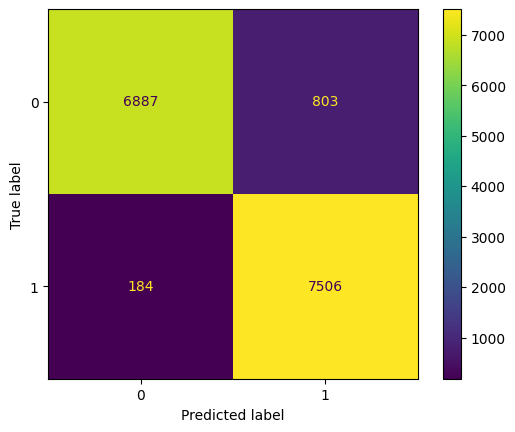

In [257]:
metrics(grid_search,X_train, y_train)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      3296
           1       0.17      0.49      0.26       249

    accuracy                           0.80      3545
   macro avg       0.56      0.66      0.57      3545
weighted avg       0.90      0.80      0.84      3545



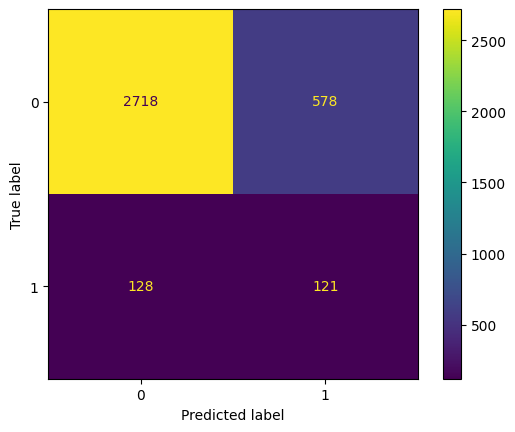

In [258]:
# Vamos a ver los valores para el test
metrics(grid_search,X_test, y_test)

In [259]:
print(grid_search.best_estimator_)

KNeighborsClassifier(leaf_size=6, n_neighbors=3)


In [260]:
# Vemos que seguimos teniendo muy mala predicción para la parte de los impagos. Vamos a intentar jugar un poco más con los valores

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1,3,5],
    'leaf_size': [5,6,7]
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=3, # Folds del cross validation
                            scoring="precision_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [5, 6, 7], 'n_neighbors': [1, 3, 5]},
             scoring='precision_macro')

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3296
           1       0.17      0.37      0.23       249

    accuracy                           0.83      3545
   macro avg       0.56      0.62      0.57      3545
weighted avg       0.89      0.83      0.86      3545



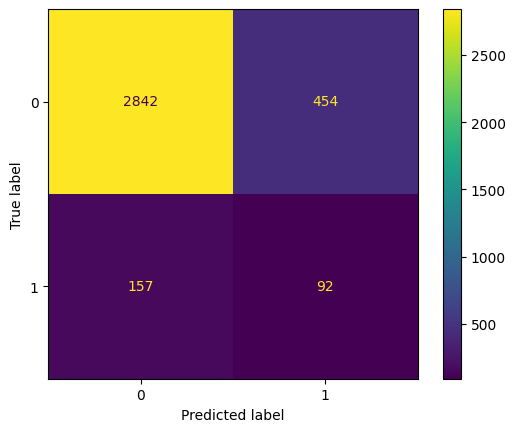

In [261]:
metrics(grid_search,X_test, y_test)

In [262]:
# Seguimos mejorando solo en el 0 y hemos empeorado el recall. Vamos a ampliar los valores por probar

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3,15,30],
    'leaf_size': [6,20,30]
}


grid_search = GridSearchCV(knn, # El modelo que quiero entrenar
                            param_grid, # El grid de parámetros
                            cv=3, # Folds del cross validation
                            scoring="precision_macro", # Métrica que quiero optimizar
                            n_jobs = -1 # Paralelizar
                            )

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [6, 20, 30], 'n_neighbors': [3, 15, 30]},
             scoring='precision_macro')

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      3296
           1       0.17      0.49      0.26       249

    accuracy                           0.80      3545
   macro avg       0.56      0.66      0.57      3545
weighted avg       0.90      0.80      0.84      3545



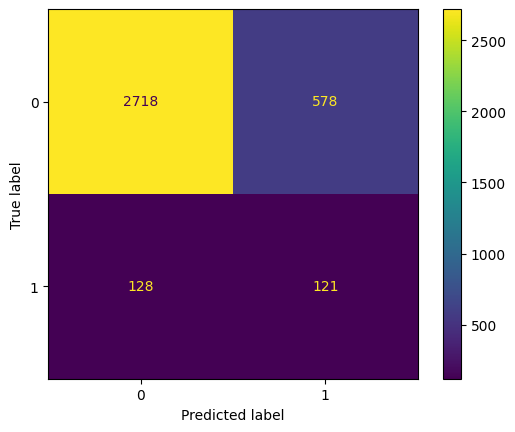

In [263]:
metrics(grid_search,X_test, y_test)

In [264]:
# Vemos que los resultados siguen sin ser buenos. Vamos a intentar obtener otro set de X_train e y_train utilizando otra técnica en vez de SMOTE

X_train = X_train_seg
y_train = y_train_seg

# Separar las clases mayoritaria y minoritaria
clase_mayoritaria = X_train[y_train == 0]
clase_minoritaria = X_train[y_train == 1]

# Bajomuestrear la clase mayoritaria
clase_mayoritaria_bajomuestreo = resample(clase_mayoritaria,
                                          replace=False,
                                          n_samples=len(clase_minoritaria),  # igual al número de la clase minoritaria
                                          random_state=42)

# Combinar la clase minoritaria con la clase mayoritaria bajomuestreada (importante es que resample mantiene los índices para que lo que viene a continuación tenga sentido)
# Esto lo puedo hacer porque los indices se mantienen (estoy quitando filas pero las que quedan
# siguen teniendo su mismo indice.
X_train_bajomuestreo = pd.concat([clase_mayoritaria_bajomuestreo, clase_minoritaria])
y_train_bajomuestreo = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], 
                                  y_train.loc[clase_minoritaria.index]])

In [265]:
lg = LogisticRegression(random_state=42, max_iter = 25000)
knn = KNeighborsClassifier(n_neighbors=3)
clf = RandomForestClassifier(max_depth=2, random_state=0)

clasificadores = [lg,knn,clf]

for clasificador in clasificadores:
    valores = {}
    print(clasificador)
    scores = cross_validate(clasificador, X_train_bajomuestreo, y_train_bajomuestreo, cv=5,
                            scoring=('precision_macro', 'recall_macro', 'f1_macro'))
    for score,matriz in scores.items():
        print(score,np.mean(matriz))
    print()
    print('***********************************')


LogisticRegression(max_iter=25000, random_state=42)
fit_time 0.0
score_time 0.006250858306884766
test_precision_macro 0.7531797499768481
test_recall_macro 0.7529840848806366
test_f1_macro 0.7529572317480551

***********************************
KNeighborsClassifier(n_neighbors=3)
fit_time 0.005731105804443359
score_time 0.008193063735961913
test_precision_macro 0.7195506133421951
test_recall_macro 0.7194223401119954
test_f1_macro 0.7193632841469595

***********************************
RandomForestClassifier(max_depth=2, random_state=0)
fit_time 0.10303230285644531
score_time 0.012149906158447266
test_precision_macro 0.7579069071793787
test_recall_macro 0.7564176245210728
test_f1_macro 0.7560678927380622

***********************************


In [266]:
# En este caso el mejor clasificado es el Randomforest

param_grid = {
    'max_depth': [3,5,10],
    'max_leaf_nodes': [1,10,100],
    'min_samples_leaf': [2,4,8],
    'min_samples_split': [2,4,8]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   cv=3, # Folds del cross validation
                                   scoring="precision_macro", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

grid_search.fit(X_train_bajomuestreo, y_train_bajomuestreo)

c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\juanmanu.gomez\AppData\Local\Programs\Python\Python

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_leaf_nodes': [1, 10, 100],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='precision_macro')

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      3296
           1       0.18      0.76      0.29       249

    accuracy                           0.74      3545
   macro avg       0.58      0.75      0.56      3545
weighted avg       0.92      0.74      0.80      3545



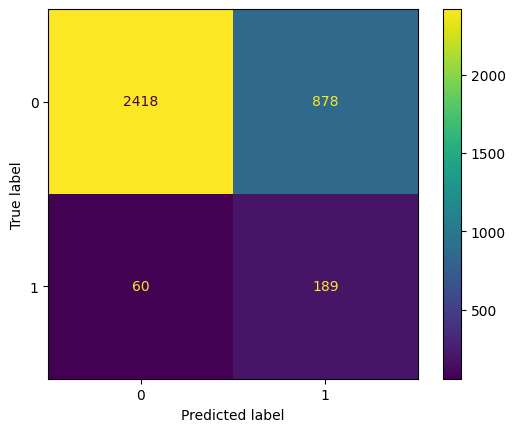

In [267]:
metrics(grid_search,X_test, y_test)

In [268]:
# Hemos conseguido mejorar mucho el recall pero no el precision ni el f1-score
# Lo intento una última vez con weight balance

X_train = x_train_seg
y_train = y_train_seg

lg = LogisticRegression(class_weight='balanced',random_state=42, max_iter = 25000)
clf = RandomForestClassifier(class_weight='balanced',max_depth=2, random_state=0)

clasificadores = [lg,clf]

for clasificador in clasificadores:
    valores = {}
    print(clasificador)
    scores = cross_validate(clasificador, X_train, y_train, cv=5,
                            scoring=('precision_macro', 'recall_macro', 'f1_macro'))
    for score,matriz in scores.items():
        print(score,np.mean(matriz))
    print()
    print('***********************************')

LogisticRegression(class_weight='balanced', max_iter=25000, random_state=42)
fit_time 0.016681766510009764
score_time 0.009933042526245116
test_precision_macro 0.5779768157593719
test_recall_macro 0.7466198288605356
test_f1_macro 0.567254651288404

***********************************
RandomForestClassifier(class_weight='balanced', max_depth=2, random_state=0)
fit_time 0.2404855728149414
score_time 0.012840890884399414
test_precision_macro 0.5722118071112747
test_recall_macro 0.7466803546811169
test_f1_macro 0.5447969525913188

***********************************


              precision    recall  f1-score   support

           0       0.98      0.75      0.85      3296
           1       0.19      0.76      0.30       249

    accuracy                           0.75      3545
   macro avg       0.58      0.75      0.57      3545
weighted avg       0.92      0.75      0.81      3545



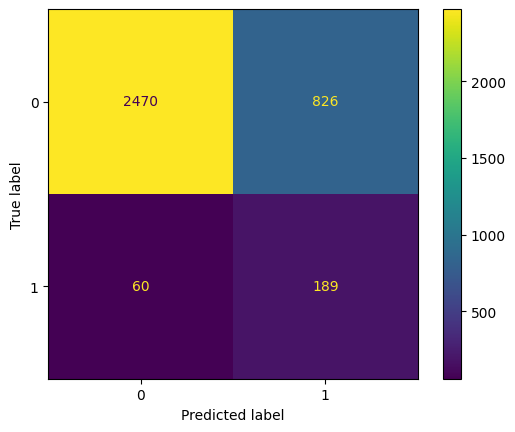

In [269]:
# miramos primero el logistic regression
lg.fit(X_train,y_train)
metrics(lg,X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      3296
           1       0.17      0.80      0.28       249

    accuracy                           0.71      3545
   macro avg       0.57      0.75      0.55      3545
weighted avg       0.92      0.71      0.78      3545



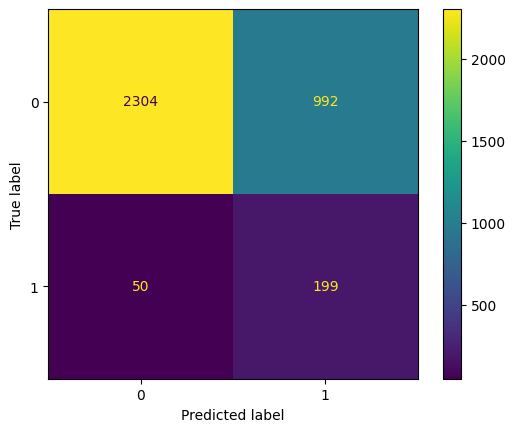

In [270]:
# miramos ahora el random forest
clf.fit(X_train,y_train)
metrics(clf,X_test, y_test)

In [272]:
# No hemos conseguido mejorar el mejor valor obtenido en e precision pero hemos obtenido un buen valor de recall en todos los casos. 
# Dado que el recall es la habilidad de encontrar los verdaderos positivos y que la precision nos da la cantidad de posititos
# que he encontrado entre todos los que he dicho que lo son, prefiero quedarme con detectar a los que no pagan
# a costa de decir que esos 992 son impagadores cuando no lo son.
